4/25: This file is no longer needed. Delete soon?



This file needs some work. For some reason it creates close (but not exactly) correct values for P_n.

In [5]:
import numpy as np
import matplotlib.pyplot as plt


#TFIM Functions

#Diagonal Dispersion
def Epsilon_0(k, J, h):
    """
    Calculate the diagonal dispersion relation for the TFIM.
    
    Parameters:
    k (float): The wave vector.
    J (float): The coupling constant.
    h (float): The transverse field strength.
    
    Returns:
    float: The diagonal dispersion relation.
    """
    return 2*h-2*J*np.cos(k)

#Full Dispersion
def Epsilon_h(k, J, h):
    """
    Calculate the full dispersion relation for the TFIM.
    
    Parameters:
    k (float): The wave vector.
    J (float): The coupling constant.
    h (float): The transverse field strength.
    
    Returns:
    float: The full dispersion relation.
    """
    return np.sqrt(Epsilon_0(k,J,h)**2+4*J**2*np.sin(k)**2)


#Diagonalization Angle

def Theta(k, J, h):
    """
    Calculate the diagonalization angle for the TFIM.
    
    Parameters:
    k (float): The wave vector.
    J (float): The coupling constant.
    h (float): The transverse field strength.
    
    Returns:
    float: The diagonalization angle.
    """
 #   return (Epsilon_0(k,J,h)+2j*J*np.sin(k))/Epsilon_h(k,J,h) 
    return np.real(-1j*np.log( (Epsilon_0(k,J,h)+2j*J*np.sin(k))/Epsilon_h(k,J,h) ) )

def Delta(k,h1,h2,J):
    """
    Calculate the difference in angle  for the TFIM.
    
    Parameters:
    k (float): The wave vector.
    h1 (float): The first transverse field strength.
    h2 (float): The second transverse field strength.
    J (float): The coupling constant.
    
    Returns:
    float: The angle differnce
    """
    return Theta(k,J,h2)-Theta(k,J,h1)

#Bogoliouv Amplitudes

def A(k,t,h1,h2,J):
    th = Theta(k,J,h2)
    delta = Delta(k,h1,h2,J)
    eps = Epsilon_h(k,J,h2)
    return np.cos(th/2)*np.cos(delta/2)*np.exp(-1j*eps*t) + np.sin(th/2)*np.sin(delta/2)*np.exp(1j*eps*t)
def B(k,t,h1,h2,J):
    th = Theta(k,J,h2)
    delta = Delta(k,h1,h2,J)
    eps = Epsilon_h(k,J,h2)
    return 1j*np.sin(th/2)*np.cos(delta/2)*np.exp(1j*eps*t) - 1j*np.cos(th/2)*np.sin(delta/2)*np.exp(-1j*eps*t)


def aa(l,t):
    phases = np.exp(-1j*l*k)
    return np.sum( A(k,t,h1,h2,J)*B(-k,t,h1,h2,J)*phases )/len(k)

def cc(l,t):
    phases = np.exp(-1j*l*k)
    return np.sum( np.conj(A(k,t,h1,h2,J))*np.conj(B(-k,t,h1,h2,J))*phases )/len(k)

def ca(l,t):
    phases = np.exp(1j*l*k)
    return np.sum( B(k,t,h1,h2,J)*np.conj(B(k,t,h1,h2,J))*phases )/len(k)    

def ac(l,t):
    phases = np.exp(1j*l*k)
    return np.sum( A(k,t,h1,h2,J)*np.conj(A(k,t,h1,h2,J))*phases )/len(k)
#Majorna Fermion Representation
def AA(i,j,t):
    l = j-i
    return cc(l,t)+ca(l,t)+ac(l,t)+aa(l,t)

def BB(i,j,t):
    l = j-i
    return -cc(l,t)-aa(l,t)+ca(l,t)+ac(l,t)

def AB(i,j,t):
    l = j-i
    return 1j*(-aa(l,t)+ac(l,t)-ca(l,t)+cc(l,t)) 

def BA(i, j, t):
    l = j - i
    return 1j * (-aa(l, t) - ac(l, t) + ca(l, t) + cc(l, t))







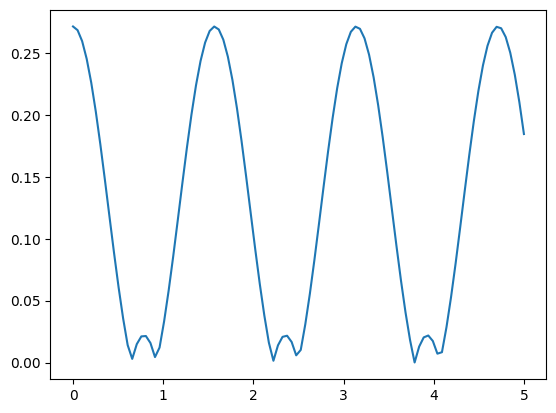

In [6]:
h1 = 1.5
h2 = 0
J =1 
L= 20
k = np.array([2*np.pi*(n+1/2)/L for n in range(0,L)])
times = np.linspace(0,5,100)
plt.plot(times,[abs(AB(0,1,ti)) for ti in times])

In [7]:
import numpy as np

def construct_M_matrix(fermion_operators, t):
    """
    Construct the antisymmetric M matrix for a list of fermionic operators.

    Parameters:
    fermion_operators : list of tuples
        Each tuple is (site index, operator type), e.g., (i, 'A') or (j, 'B')
    t : float
        Time parameter
    correlation_function : function
        A function taking (op1, op2, t) and returning ⟨f_i f_j⟩

    Returns:
    M : np.ndarray
        Antisymmetric complex matrix
    """
    l = len(fermion_operators)
    M = np.zeros((l, l), dtype=np.complex128)

    for mu in range(l):
        for nu in range(mu + 1, l):
            op1 = fermion_operators[mu]
            op2 = fermion_operators[nu]
            M[mu, nu] = correlation_function(op1, op2, t)
            M[nu, mu] = -M[mu, nu]

    return M


In [8]:
def correlation_function(op_string_1, op_string_2, t):
    #Unpack
    i, op1 = op_string_1
    j, op2 = op_string_2
    ##Compute Correlations
    if op1 == "A" and op2 == "A":
        return AA(i,j, t)  # ⟨A_i A_j⟩
    elif op1 == "B" and op2 == "B":
        return BB(i,j,t)  # ⟨B_i,B_j⟩
    elif op1 == "A" and op2 == "B":
        return AB(i,j,t)  # ⟨A_i A_j⟩
    elif op1 == "B" and op2 == "A":
        return BA(i,j,t) # ⟨B_i A_j⟩


In [9]:

def remove_duplicates_in_pairs(vec):
    counts = Counter(vec)
    filtered_vals = [val for val, freq in counts.items() if freq % 2 != 0]
    return filtered_vals

def sigma_general(indices,t):
    #All odd operators are zero if h1>1
    if len(indices)%2 ==1:
        return 0


    #Takes in Indices which should be general. E.G. 
    #indices = [1,2,3,4,5] will compute the 5 point function

    indices = np.sort(indices)


    indices = remove_duplicates_in_pairs(indices)
    #If there are no indices left then the answer is 1
        #This is because the expectation value of <sigma^2> = 1
    if len(indices)==0:
        return 1

    #Build String List
    string_list = []

    for i in range(len(indices)):
        if i % 2 == 0:
            string_list.append((indices[i], "B"))
        else:
            string_list.append((indices[i], "A"))

        #Inter-Term Strings
        #Inter-Term Strings are formed by pairs of sigma_x
        #Eg. <sigma_i sigma_j> has a string between i+1:j-1 
        #Since we sorted already, we can go forward in steps of 2
    pf = (-1j)**(len(indices)//2)
     
     
    for i in range(0, len(indices) - 1, 2):
        for a in range(indices[i] + 1, indices[i + 1]):
            pf *= 1j
            string_list.append((a, "B"))
            string_list.append((a, "A"))

    M = construct_M_matrix(string_list,t)


    f= np.linalg.det(M*pf)

    return np.sqrt(np.real(f))
      

In [10]:
h1 = 0
h2 = 2
J =1 
L= 20
k = np.array([2*np.pi*(n+1/2)/L for n in range(0,L)])
times = np.linspace(0,5,100)
J =1 
h_i = np.linspace(0,2,50)

dat =[]
dat2=[]
dat3=[]
for hi in h_i:
    h1 = hi
    dat.append(P_n(2,0))
    dat2.append(P_n(3,0))
    dat3.append(P_n(4,0))

plt.plot(dat)
plt.plot(dat2)
plt.plot(dat3)

NameError: name 'P_n' is not defined

In [ ]:

from collections import Counter


In [ ]:
from itertools import combinations

def binomial_expansion(indices):
    return list(combinations(indices, 2))


def unique_elements_and_frequencies(vec):
    counter = Counter(vec)
    unique_vals = list(counter.keys())
    freqs = list(counter.values())
    return unique_vals, freqs

    


In [ ]:
from itertools import combinations
import numpy as np

def P_n(n, t):
    indices = list(range(1, n + 1))
    x = []
    for r in range(1, len(indices)+1):
        x.extend(combinations(indices, r))

    x_c = []
    for a in x:
        shifted = tuple(np.array(a) - a[0])
        x_c.append(shifted)

    corrs, degen = unique_elements_and_frequencies(x_c)

    P = 1
    for i in range(len(corrs)):
        P += degen[i] * sigma_general(corrs[i], t)

    return P / (2 ** n)

P_n(4,0)


np.float64(0.13014417250556895)

In [ ]:
L = 20
h1 =0
h2 =0.
k = np.array([2*np.pi*(n+1/2)/L for n in range(0,L-1)])
h_final = np.linspace(0,2,25)
dat = []
dat2= []
dat3= []
dat4= []
dat5= []
dat6= []
for hi in h_final:
    h1 = hi
    dat.append(P_n(1,0))
    dat2.append(P_n(2,0))
    dat3.append(P_n(3,0))
    dat4.append(P_n(4,0))
    dat5.append(P_n(5,0))
    dat6.append(P_n(6,0))
dat=np.array(dat)
dat2=np.array(dat2)
dat3=np.array(dat3)
dat4=np.array(dat4)
dat5=np.array(dat5)
dat6=np.array(dat6)

In [ ]:
dat3


array([0.49934037, 0.49866903, 0.49663335, 0.49318667, 0.48825099,
       0.48171206, 0.47341238, 0.46314236, 0.45062928, 0.4354998 ,
       0.41707385, 0.39377915, 0.36475532, 0.33669788, 0.3151001 ,
       0.2985044 , 0.28510319, 0.27392595, 0.26441944, 0.25622246,
       0.24907784, 0.24279357, 0.23722224, 0.23224847, 0.22778057])

In [ ]:
h1=0
P_n(2,0)

np.float64(0.49996693288833566)

In [ ]:
import julia
julia.install()

The latest version of Julia in the `release` channel is 1.11.5+0.x64.apple.darwin14. You currently have `1.11.4+0.x64.apple.darwin14` installed. Run:

  juliaup update

in your terminal shell to install Julia 1.11.5+0.x64.apple.darwin14 and update the `release` channel to that version.
[ Info: Julia version info


Julia Version 1.11.4
Commit 8561cc3d68d (2025-03-10 11:36 UTC)
Build Info:
  Official https://julialang.org/ release
Platform Info:
  OS: macOS (x86_64-apple-darwin24.0.0)
  uname: Darwin 20.6.0 Darwin Kernel Version 20.6.0: Tue Feb 22 21:10:41 PST 2022; root:xnu-7195.141.26~1/RELEASE_X86_64 x86_64 i386
  CPU: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz: 
              speed         user         nice          sys         idle          irq
       #1  1400 MHz      78244 s          0 s      58531 s     587421 s          0 s
       #2  1400 MHz       5464 s          0 s       5756 s     712938 s          0 s
       #3  1400 MHz      69818 s          0 s      50648 s     603692 s          0 s
       #4  1400 MHz       5256 s          0 s       5106 s     713795 s          0 s
       #5  1400 MHz      56678 s          0 s      37688 s     629791 s          0 s
       #6  1400 MHz       5254 s          0 s       4742 s     714161 s          0 s
       #7  1400 MHz      49636 s          0 s     

[ Info: Julia executable: /Users/kristianmunnikhuis/.julia/juliaup/julia-1.11.4+0.x64.apple.darwin14/bin/julia
[ Info: Trying to import PyCall...
┌ Error: `import PyCall` failed
│   exception =
│    ArgumentError: Package PyCall [438e738f-606a-5dbb-bf0a-cddfbfd45ab0] is required but does not seem to be installed:
│     - Run `Pkg.instantiate()` to install all recorded dependencies.
│    
│    Stacktrace:
│      [1] _require(pkg::Base.PkgId, env::Nothing)
│        @ Base ./loading.jl:2515
│      [2] __require_prelocked(uuidkey::Base.PkgId, env::Nothing)
│        @ Base ./loading.jl:2388
│      [3] #invoke_in_world#3
│        @ ./essentials.jl:1089 [inlined]
│      [4] invoke_in_world
│        @ ./essentials.jl:1086 [inlined]
│      [5] _require_prelocked
│        @ ./loading.jl:2375 [inlined]
│      [6] _require_prelocked
│        @ ./loading.jl:2374 [inlined]
│      [7] macro expansion
│        @ ./lock.jl:273 [inlined]
│      [8] require(uuidkey::Base.PkgId)
│        @ Base ./loading.

In [52]:
x, y = read_projector_data("../results/partial_projectors/L=8_TFIM_projectors.txt")


In [51]:
def read_projector_data(filename):
    """
    Read the projector data from a file and return the x values and data as a numpy array.
    
    Parameters:
    filename (str): The path to the file containing the projector data.
    
    Returns:
    tuple: A tuple containing the x values and the data as a numpy array.
    """
    with open(filename) as f:
        lines = f.readlines()

    x_vals = [float(val) for val in lines[0].strip().split('\t')]
    data_list = []
    for line in lines[1:]:
        formatted_line = line.strip().replace("im", "j")
        data_array = np.array([complex(val.replace(" ", "")) for val in formatted_line.split('\t')])
        data_list.append(data_array)

    return x_vals, data_list


In [37]:
data_list = []
for line in lines[1:]:
    formatted_line = line.strip().replace("im", "j")
    data_array = np.array([complex(val.replace(" ", "")) for val in formatted_line.split('\t')])
    data_list.append(data_array)

/home/kristian/miniconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/kristian/miniconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


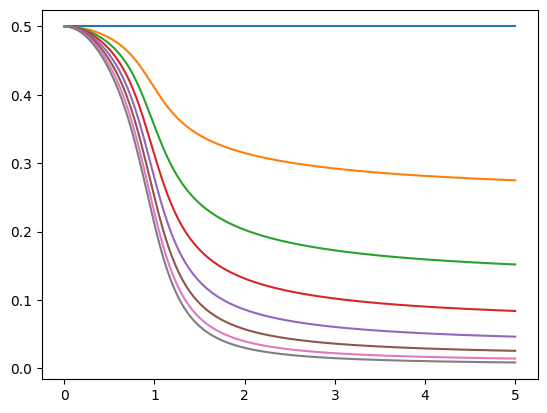

In [53]:
for yi in y:
    plt.plot(x,yi)

In [49]:
y[1]

np.complex128(0.5+0j)